<a href="https://colab.research.google.com/github/vicperry/python-para-ciencia-de-dados/blob/master/7-analise-de-dados-com-python-e-pandas/2_trabalhando_com_planilhas_excel_datas_e_visualizacao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalhando com códigos no Excel**

In [ ]:
#importando a biblioteca
import pandas as pd

In [ ]:
#leitura de arquivos
df1 = pd.read_excel('/content/drive/MyDrive/analise_dados_dio_datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/analise_dados_dio_datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/analise_dados_dio_datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/analise_dados_dio_datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/analise_dados_dio_datasets/Salvador.xlsx')

In [ ]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#exibindo 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520.0,1.0
1,Aracaju,2018-01-01,14.21,1522.0,6.0
2,Aracaju,2018-01-01,71.55,1520.0,1.0
3,Aracaju,2018-01-01,3.01,1521.0,7.0
4,Aracaju,2018-01-01,24.51,1522.0,8.0


In [ ]:
#exibindo 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034.0,1.0
236,Salvador,2019-01-03,126.29,1035.0,3.0
237,Salvador,2019-01-03,38.06,1036.0,3.0
238,Salvador,2019-01-03,139.64,1035.0,1.0
239,Salvador,2019-01-03,161.41,1037.0,3.0


In [ ]:
#gerando amostra
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
195,Natal,2019-01-02,44.89,1036.0,3.0
69,Recife,2019-01-01,38.83,981.0,1.0
13,Fortaleza,2019-02-12,118.58,1003.0,4.0
157,Natal,2019-01-02,150.17,1036.0,2.0
52,Natal,2018-04-27,778.00,854.0,4.0


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID           float64
Qtde             float64
dtype: object

In [ ]:
#alterando tipo de dado de uma coluna
df['LojaID'] = df['LojaID'].astype('object')

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde             float64
dtype: object

# **Tratando valores faltantes**

In [ ]:
#consultando linhas com valores faltantes
df.isnull().sum() #isnull verifica se o valor está nulo (True/False), sum soma todos os valores True da coluna

Cidade    0
Data      0
Vendas    6
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#substituindo valores nulos pela média
df['Vendas'].fillna(df['Vendas'].mean, inplace = True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
43,Salvador,2019-01-01,12.21,1034.0,1.0
126,Salvador,2019-03-02,41.69,1036.0,2.0
91,Natal,2019-01-02,17.74,1035.0,1.0
79,Recife,2019-01-01,14.53,983.0,6.0
115,Fortaleza,2019-03-02,12.23,981.0,3.0
193,Salvador,2019-01-02,3.97,1036.0,2.0
125,Fortaleza,2019-03-02,37.6,983.0,4.0
180,Salvador,2019-01-02,116.63,1035.0,2.0
57,Recife,2019-01-01,201.41,980.0,3.0
41,Aracaju,2018-01-01,229.64,1520.0,8.0


In [ ]:
df["Vendas"].mean() #os valores nulos foram substituidos por zero

122.97742117117117

In [ ]:
#dá para substituir por zero
df['Vendas'].fillna(0, inplace = True)

In [ ]:
#apagar linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
#apagar as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=['Vendas'], inplace=True)

In [ ]:
#remover linhas com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

# **Criando uma coluna nova**

In [ ]:
df['Receita'] = df['Vendas'].mul(df['Qtde'])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520.0,1.0,142.00
1,Aracaju,2018-01-01,14.21,1522.0,6.0,85.26
2,Aracaju,2018-01-01,71.55,1520.0,1.0,71.55
3,Aracaju,2018-01-01,3.01,1521.0,7.0,21.07
4,Aracaju,2018-01-01,24.51,1522.0,8.0,196.08


In [ ]:
df['Receita/Vendas'] = df['Receita'] / df['Vendas']
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520.0,1.0,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522.0,6.0,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520.0,1.0,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521.0,7.0,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522.0,8.0,196.08,8.0


In [ ]:
#o maior valor de uma coluna
df['Receita'].max()

3544.0

In [ ]:
#o menor valor de uma coluna
df['Receita'].min()

0.0

In [ ]:
#nlargest
df.nlargest(3, 'Receita') #um top 3 com base na coluna receita

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853.0,4.0,3544.0,4.0
51,Natal,2018-01-21,859.0,852.0,4.0,3436.0,4.0
55,Natal,2019-01-08,859.0,854.0,4.0,3436.0,4.0


In [ ]:
#nsmallest
df.nsmallest(3, 'Receita') #as 3 piores receitas

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
1,Salvador,2018-01-01,0.0,1034.0,3.0,0.0,NaN
6,Salvador,2019-01-01,0.0,1034.0,2.0,0.0,NaN
8,Salvador,2019-02-11,0.0,1036.0,2.0,0.0,NaN


In [ ]:
#agrupando por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      39437.46
Name: Receita, dtype: float64

In [ ]:
#ordenando o conjunto de dados
df.sort_values('Receita', ascending = False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853.0,4.0,3544.0,4.0
51,Natal,2018-01-21,859.0,852.0,4.0,3436.0,4.0
55,Natal,2019-01-08,859.0,854.0,4.0,3436.0,4.0
30,Natal,2018-10-02,856.0,853.0,4.0,3424.0,4.0
41,Natal,2018-05-20,835.0,852.0,4.0,3340.0,4.0
10,Natal,2018-10-27,828.0,852.0,4.0,3312.0,4.0
38,Natal,2018-02-25,828.0,852.0,4.0,3312.0,4.0
69,Natal,2019-03-24,817.0,852.0,4.0,3268.0,4.0
62,Natal,2018-02-10,793.0,854.0,4.0,3172.0,4.0
52,Natal,2018-04-27,778.0,854.0,4.0,3112.0,4.0


# **Trabalhando com datas**

In [ ]:
#transformando a coluna de data um tipo inteiro
df['Data'] = df['Data'].astype('int64')

In [ ]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID            float64
Qtde              float64
Receita           float64
Receita/Vendas    float64
dtype: object

In [ ]:
#transformando coluna de data em tipo data
df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                   float64
Qtde                     float64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
#agrupando por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118119.47
2019    227144.24
Name: Receita, dtype: float64

In [ ]:
#criando uma nova coluna com o ano
df['Ano_Venda'] = df['Data'].dt.year
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520.0,1.0,142.00,1.0,2018
1,Aracaju,2018-01-01,14.21,1522.0,6.0,85.26,6.0,2018
2,Aracaju,2018-01-01,71.55,1520.0,1.0,71.55,1.0,2018
3,Aracaju,2018-01-01,3.01,1521.0,7.0,21.07,7.0,2018
4,Aracaju,2018-01-01,24.51,1522.0,8.0,196.08,8.0,2018


In [ ]:
#extraindo o mês e o dia
df['Mes_Venda'], df['Dia_Venda'] = (df['Data'].dt.month, df['Data'].dt.day)
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda
159,Natal,2019-01-02,172.52,1035.0,1.0,172.52,1.0,2019,1,2
84,Natal,2019-01-02,22.99,1036.0,1.0,22.99,1.0,2019,1,2
124,Fortaleza,2019-03-02,47.98,983.0,7.0,335.86,7.0,2019,3,2
81,Aracaju,2018-01-01,53.41,1520.0,2.0,106.82,2.0,2018,1,1
199,Natal,2019-01-02,153.87,1036.0,3.0,461.61,3.0,2019,1,2


In [ ]:
#extraindo data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#calculando diferença entre dias
df['diferenca_dias'] = df['Data'] - df['Data'].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias
76,Aracaju,2018-01-01,33.51,1523.0,4.0,134.04,4.0,2018,1,1,0 days
0,Aracaju,2018-01-01,142.00,1520.0,1.0,142.00,1.0,2018,1,1,0 days
17,Recife,2019-02-14,142.45,981.0,3.0,427.35,3.0,2019,2,14,409 days
20,Salvador,2019-01-01,33.97,1034.0,3.0,101.91,3.0,2019,1,1,365 days
81,Natal,2019-04-02,564.00,854.0,2.0,1128.00,2.0,2019,4,2,456 days


In [ ]:
#criando uma coluna de trimestre
df["semestre_venda"] = df['Data'].dt.quarter
df.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,semestre_venda
206,Natal,2019-01-02,151.45,1036.0,2.0,302.9,2.0,2019,1,2,366 days,1
32,Natal,2019-03-17,244.00,854.0,2.0,488.0,2.0,2019,3,17,440 days,1
5,Fortaleza,2019-01-01,37.30,1002.0,5.0,186.5,5.0,2019,1,1,365 days,1


In [ ]:
#filtrando vendas de 2019 do mes de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,semestre_venda
108,Fortaleza,2019-03-02,152.89,981.0,4.0,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982.0,6.0,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983.0,6.0,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981.0,3.0,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982.0,1.0,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036.0,3.0,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037.0,3.0,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036.0,1.0,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036.0,2.0,41.58,2.0,2019,3,2,425 days,1


# **Visualização de dados**

In [ ]:
#contagem de registros por coluna
df['LojaID'].value_counts(ascending=False)

1036.0    117
1035.0    112
1037.0    101
1034.0     67
983.0      65
982.0      44
1522.0     41
1520.0     39
980.0      36
981.0      31
1005.0     30
1002.0     30
852.0      29
1523.0     29
1004.0     28
854.0      28
853.0      26
1521.0     21
1003.0     20
Name: LojaID, dtype: int64

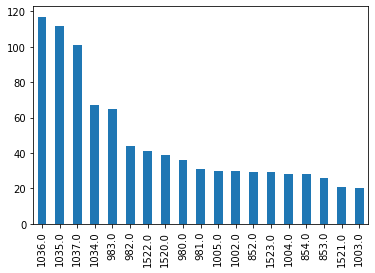

In [ ]:
#gerando gráfico
df['LojaID'].value_counts(ascending=False).plot.bar()

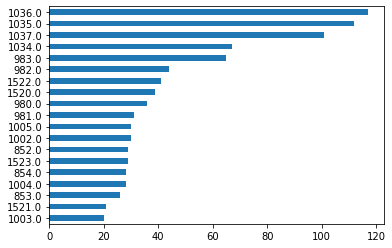

In [ ]:
df['LojaID'].value_counts(ascending=True).plot.barh();

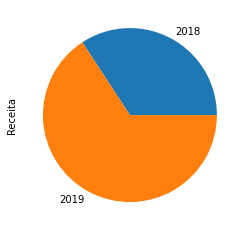

In [ ]:
#gráfico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [ ]:
#total de vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

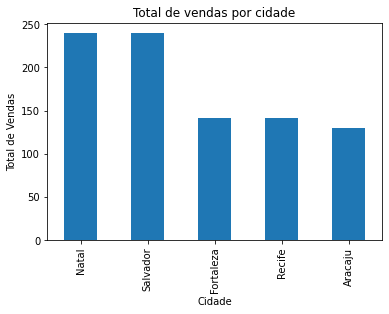

In [ ]:
#adicionando título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas');

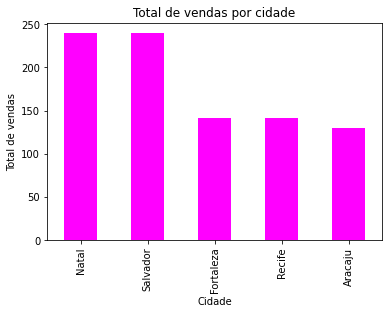

In [ ]:
#alterando a cor
df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade', color='magenta')
plt.xlabel('Cidade')
plt.ylabel('Total de vendas');

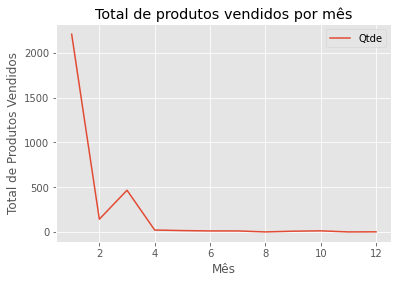

In [ ]:
#alterando o estilo
plt.style.use('ggplot')
df.groupby(df['Mes_Venda'])['Qtde'].sum().plot(title = 'Total de produtos vendidos por mês')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos')
plt.legend();

In [ ]:
df.groupby(df['Mes_Venda'])['Qtde'].sum()

Mes_Venda
1     2208.0
2      144.0
3      467.0
4       23.0
5       17.0
6       13.0
7       13.0
8        2.0
9       10.0
10      14.0
11       2.0
12       3.0
Name: Qtde, dtype: float64

In [ ]:
#selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum()

Mes_Venda
1    1541.0
2     128.0
3     460.0
4      12.0
Name: Qtde, dtype: float64

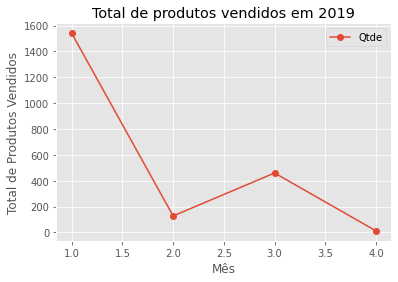

In [ ]:
#total produtos vendidos por mês
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker = 'o', title= 'Total de produtos vendidos em 2019')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos')
plt.legend();

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

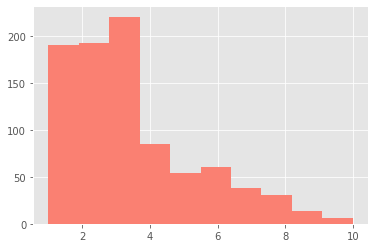

In [ ]:
#histograma
plt.hist(df['Qtde'], color="salmon")

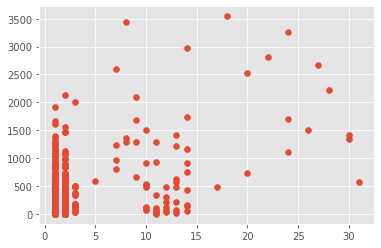

In [ ]:
#gráfico de dispersão
plt.scatter(x= df_2019['Dia_Venda'], y = df_2019['Receita']);

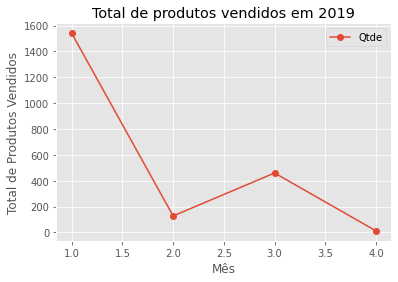

In [ ]:
#salvando em png
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker = 'o', title= 'Total de produtos vendidos em 2019')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos')
plt.legend();
plt.savefig('grafico QTDE x MES.png')